In [ ]:
#fix random seed
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
#import libraries
import numpy as np
import numpy
from numpy import array
from numpy import concatenate
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import math
from math import sqrt
#keras is the main package for nn and deep learning
import keras
from keras.models import Sequential
from keras.layers import Dense
#considering LSTM nets
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout
#if the training goes wrong
from keras.callbacks import EarlyStopping
import statsmodels.api as sm

In [ ]:
#convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	#input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	#forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	#put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	#drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
#import files
from google.colab import files
 
 
uploaded = files.upload()

Saving cls_radio_flux_f8.csv to cls_radio_flux_f8.csv
Saving cls_radio_flux_f15.csv to cls_radio_flux_f15.csv
Saving cls_radio_flux_f30.csv to cls_radio_flux_f30.csv
Saving cls_radio_flux_f32.csv to cls_radio_flux_f32.csv
Saving cls_radio_flux_f107.csv to cls_radio_flux_f107.csv


In [ ]:
#create a list of dataframes
df=[]    
df.append(pd.read_csv('cls_radio_flux_f8.csv'))
df.append(pd.read_csv('cls_radio_flux_f15.csv'))
df.append(pd.read_csv('cls_radio_flux_f30.csv'))
df.append(pd.read_csv('cls_radio_flux_f32.csv'))
df.append(pd.read_csv('cls_radio_flux_f107.csv'))

In [ ]:
#join datasets
df[0]=df[0][['time (yyyy MM dd)','absolute_f8 (solar flux unit (SFU))']]
df[0]['absolute_f15 (solar flux unit (SFU))']=df[1]['absolute_f15 (solar flux unit (SFU))']
df[0]['absolute_f30 (solar flux unit (SFU))']=df[2]['absolute_f30 (solar flux unit (SFU))']
df[0]['absolute_f32 (solar flux unit (SFU))']=df[3]['absolute_f32 (solar flux unit (SFU))']
df[0]['absolute_f107 (solar flux unit (SFU))']=df[4]['absolute_f107 (solar flux unit (SFU))']

In [ ]:
#change name
df = df[0]

In [ ]:
#dataframe without dates
y = df[['absolute_f8 (solar flux unit (SFU))',	'absolute_f15 (solar flux unit (SFU))',	'absolute_f30 (solar flux unit (SFU))',	'absolute_f32 (solar flux unit (SFU))',	'absolute_f107 (solar flux unit (SFU))']]
n_vars = y.shape[1]

In [ ]:
#compute lenght for graphs
X = ([x for x in range(0, len(y['absolute_f8 (solar flux unit (SFU))']))])

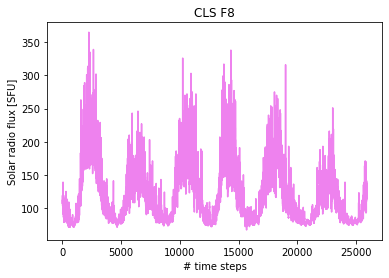

In [ ]:
plt.title('CLS F8')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f8 (solar flux unit (SFU))'], color = 'violet', label = 'cls f8 original')

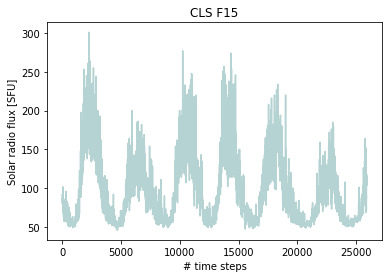

In [ ]:
plt.title('CLS F15')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f15 (solar flux unit (SFU))'], color = '#b5d3d2', label = 'cls f15 original')

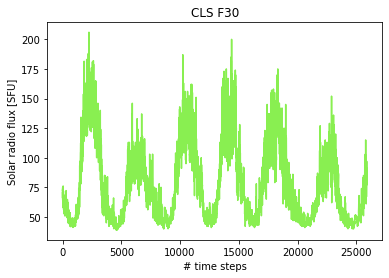

In [ ]:
plt.title('CLS F30')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f30 (solar flux unit (SFU))'], color = '#89ef51', label = 'cls f30 original')

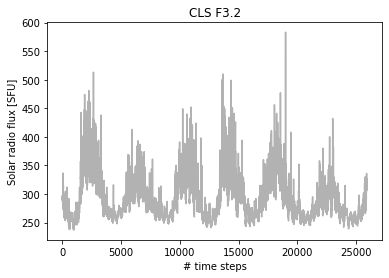

In [ ]:
plt.title('CLS F3.2')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f32 (solar flux unit (SFU))'], color = '#b2b2b2', label = 'cls f32 original')

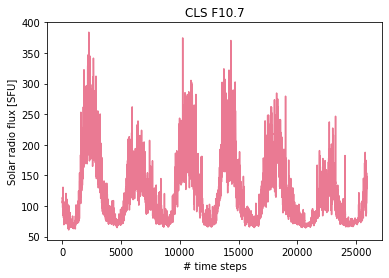

In [ ]:
plt.title('CLS F10.7')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f107 (solar flux unit (SFU))'], color = '#ea7a93', label = 'cls f107 original')

In [ ]:
#NumPy representation
values = y.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
#reframe for supervised learning
nin = 13
nout = 50
reframed = series_to_supervised(scaled, nin, nout)
reframed

var1(t-13)  var2(t-13)  var3(t-13)  var4(t-13)  var5(t-13)  var1(t-12)  \
13       0.149329    0.160784    0.188024    0.157895    0.143653    0.141611   
14       0.141611    0.153333    0.181437    0.152689    0.135604    0.139597   
15       0.139597    0.149412    0.176647    0.152689    0.139938    0.131879   
16       0.131879    0.135686    0.160479    0.152111    0.143344    0.150671   
17       0.150671    0.164706    0.191617    0.152689    0.164396    0.161074   
...           ...         ...         ...         ...         ...         ...   
25849    0.108389    0.160784    0.167665    0.109312    0.107121    0.099329   
25850    0.099329    0.152941    0.155689    0.109312    0.094427    0.090604   
25851    0.090604    0.141176    0.143713    0.100636    0.085139    0.085570   
25852    0.085570    0.137255    0.131737    0.097744    0.083901    0.091275   
25853    0.091275    0.137255    0.137725    0.100636    0.091022    0.087248   

       var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  ...  var1(t+48)  \
13       0.153333    0.181437    0.152689    0.135604  ...    0.140940   
14       0.149412    0.176647    0.152689    0.139938  ...    0.127517   
15       0.135686    0.160479    0.152111    0.143344  ...    0.117450   
16       0.164706    0.191617    0.152689    0.164396  ...    0.097315   
17       0.178039    0.204192    0.160787    0.164706  ...    0.090604   
...           ...         ...         ...         ...  ...         ...   
25849    0.152941    0.155689    0.109312    0.094427  ...    0.191275   
25850    0.141176    0.143713    0.100636    0.085139  ...    0.194631   
25851    0.137255    0.131737    0.097744    0.083901  ...    0.191275   
25852    0.137255    0.137725    0.100636    0.091022  ...    0.204698   
25853    0.100784    0.161677    0.161365    0.083282  ...    0.218121   

       var2(t+48)  var3(t+48)  var4(t+48)  var5(t+48)  var1(t+49)  var2(t+49)  \
13       0.141961    0.170659    0.170330    0.122601    0.127517    0.124706   
14       0.124706    0.152695    0.171776    0.106192    0.117450    0.111373   
15       0.111373    0.142515    0.160787    0.087926    0.097315    0.100000   
16       0.100000    0.133533    0.150087    0.083901    0.090604    0.100784   
17       0.100784    0.137126    0.133603    0.088545    0.090268    0.097647   
...           ...         ...         ...         ...         ...         ...   
25849    0.239608    0.269461    0.213418    0.229412    0.194631    0.236863   
25850    0.236863    0.281437    0.222094    0.229412    0.191275    0.241176   
25851    0.241176    0.293413    0.216310    0.229412    0.204698    0.245098   
25852    0.245098    0.311377    0.224986    0.235604    0.218121    0.254902   
25853    0.254902    0.305389    0.230769    0.235604    0.234899    0.266667   

       var3(t+49)  var4(t+49)  var5(t+49)  
13       0.152695    0.171776    0.106192  
14       0.142515    0.160787    0.087926  
15       0.133533    0.150087    0.083901  
16       0.137126    0.133603    0.088545  
17       0.134132    0.133892    0.086687  
...           ...         ...         ...  
25849    0.281437    0.222094    0.229412  
25850    0.293413    0.216310    0.229412  
25851    0.311377    0.224986    0.235604  
25852    0.305389    0.230769    0.235604  
25853    0.287425    0.236553    0.269659  

[25841 rows x 315 columns]

In [ ]:
#drop columns not to be predicted
reframedd = reframed.iloc[:,0:nin*n_vars-1]
for i in range(nin*n_vars-1, reframed.shape[1], n_vars):
  reframedd= pd.concat([reframedd, reframed.iloc[:,i]], axis=1)

reframedd

var1(t-13)  var2(t-13)  var3(t-13)  var4(t-13)  var5(t-13)  var1(t-12)  \
13       0.149329    0.160784    0.188024    0.157895    0.143653    0.141611   
14       0.141611    0.153333    0.181437    0.152689    0.135604    0.139597   
15       0.139597    0.149412    0.176647    0.152689    0.139938    0.131879   
16       0.131879    0.135686    0.160479    0.152111    0.143344    0.150671   
17       0.150671    0.164706    0.191617    0.152689    0.164396    0.161074   
...           ...         ...         ...         ...         ...         ...   
25849    0.108389    0.160784    0.167665    0.109312    0.107121    0.099329   
25850    0.099329    0.152941    0.155689    0.109312    0.094427    0.090604   
25851    0.090604    0.141176    0.143713    0.100636    0.085139    0.085570   
25852    0.085570    0.137255    0.131737    0.097744    0.083901    0.091275   
25853    0.091275    0.137255    0.137725    0.100636    0.091022    0.087248   

       var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  ...  var5(t+40)  \
13       0.153333    0.181437    0.152689    0.135604  ...    0.186687   
14       0.149412    0.176647    0.152689    0.139938  ...    0.180805   
15       0.135686    0.160479    0.152111    0.143344  ...    0.166563   
16       0.164706    0.191617    0.152689    0.164396  ...    0.142724   
17       0.178039    0.204192    0.160787    0.164706  ...    0.147988   
...           ...         ...         ...         ...  ...         ...   
25849    0.152941    0.155689    0.109312    0.094427  ...    0.232508   
25850    0.141176    0.143713    0.100636    0.085139  ...    0.207740   
25851    0.137255    0.131737    0.097744    0.083901  ...    0.235604   
25852    0.137255    0.137725    0.100636    0.091022  ...    0.235604   
25853    0.100784    0.161677    0.161365    0.083282  ...    0.235604   

       var5(t+41)  var5(t+42)  var5(t+43)  var5(t+44)  var5(t+45)  var5(t+46)  \
13       0.180805    0.166563    0.142724    0.147988    0.141486    0.141176   
14       0.166563    0.142724    0.147988    0.141486    0.141176    0.136533   
15       0.142724    0.147988    0.141486    0.141176    0.136533    0.122601   
16       0.147988    0.141486    0.141176    0.136533    0.122601    0.106192   
17       0.141486    0.141176    0.136533    0.122601    0.106192    0.087926   
...           ...         ...         ...         ...         ...         ...   
25849    0.207740    0.235604    0.235604    0.235604    0.263467    0.266563   
25850    0.235604    0.235604    0.235604    0.263467    0.266563    0.229412   
25851    0.235604    0.235604    0.263467    0.266563    0.229412    0.229412   
25852    0.235604    0.263467    0.266563    0.229412    0.229412    0.229412   
25853    0.263467    0.266563    0.229412    0.229412    0.229412    0.229412   

       var5(t+47)  var5(t+48)  var5(t+49)  
13       0.136533    0.122601    0.106192  
14       0.122601    0.106192    0.087926  
15       0.106192    0.087926    0.083901  
16       0.087926    0.083901    0.088545  
17       0.083901    0.088545    0.086687  
...           ...         ...         ...  
25849    0.229412    0.229412    0.229412  
25850    0.229412    0.229412    0.229412  
25851    0.229412    0.229412    0.235604  
25852    0.229412    0.235604    0.235604  
25853    0.235604    0.235604    0.269659  

[25841 rows x 115 columns]

In [ ]:
#NumPy
values=reframedd.values

In [ ]:
#split into train and test
train_size = int(len(reframedd['var1(t-1)'] ) * 0.8)
train = values[:train_size, :]
test = values[train_size:, :]

In [ ]:
#split into inputs and outputs
n_obs = nin*n_vars
train_X, train_y = train[:, :n_obs], train[:, -nout:]
test_X, test_y = test[:, :n_obs], test[:, -nout:]
print(train_X.shape, len(train_X), train_y.shape)
train_y

(20672, 65) 20672 (20672, 50)


array([[0.12291022, 0.12352941, 0.12074303, ..., 0.13653251, 0.12260062,
        0.10619195],
       [0.12352941, 0.12074303, 0.12724458, ..., 0.12260062, 0.10619195,
        0.0879257 ],
       [0.12074303, 0.12724458, 0.11702786, ..., 0.10619195, 0.0879257 ,
        0.08390093],
       ...,
       [0.01331269, 0.01547988, 0.01362229, ..., 0.01640867, 0.01393189,
        0.01640867],
       [0.01547988, 0.01362229, 0.0120743 , ..., 0.01393189, 0.01640867,
        0.01702786],
       [0.01362229, 0.0120743 , 0.0130031 , ..., 0.01640867, 0.01702786,
        0.01857585]])

In [ ]:
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], nin, n_vars))
test_X = test_X.reshape((test_X.shape[0], nin, n_vars))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(20672, 13, 5) (20672, 50) (5169, 13, 5) (5169, 50)


In [ ]:
#number of neurons
nn = 9

In [ ]:
#architechture
model = Sequential()
#input layer
model.add(LSTM(nn, return_sequences=True, activation='tanh', input_shape=(train_X.shape[1], train_X.shape[2])))
#first hidden layer
model.add(LSTM(nn, activation='tanh', return_sequences=True))
#second
model.add(LSTM(nn, activation='tanh'))
# output set to forecast nout values
model.add(Dense(nout))
#compile
model.compile(optimizer = 'adam', loss = 'mse')
#summarize
model.summary()
#fit
history=model.fit(train_X, train_y, epochs = 36, batch_size = 2, verbose = 2, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 9)             540       
                                                                 
 lstm_1 (LSTM)               (None, 13, 9)             684       
                                                                 
 lstm_2 (LSTM)               (None, 9)                 684       
                                                                 
 dense (Dense)               (None, 50)                500       
                                                                 
Total params: 2,408
Trainable params: 2,408
Non-trainable params: 0
_________________________________________________________________
Epoch 1/36
8269/8269 - 64s - loss: 0.0071 - val_loss: 0.0062 - 64s/epoch - 8ms/step
Epoch 2/36
8269/8269 - 59s - loss: 0.0058 - val_loss: 0.0054 - 59s/epoch - 7ms/step
Epoch 3/36
8269/82

In [ ]:
#make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

162/162 [==============================] - 2s 3ms/step


In [ ]:
#NumPy
reframedd = reframedd.values

In [ ]:
#compute and make a list of all the rmse, predicted and observed values, and relative error
rmse = []
pred = []
obs = []
re = []
for i in range(0, nout):
  a = pd.DataFrame(reframedd[train_size:, :4])
  a['pred']=testPredict[:, i]
  a = scaler.inverse_transform(a)
  a = pd.DataFrame(a)
  b = pd.DataFrame(reframedd[train_size:, :4])
  b['obs'] = reframedd[train_size:, -(nout-i)]
  b = scaler.inverse_transform(b)
  b = pd.DataFrame(b)
  aa = pd.DataFrame()
  aa['pred'] = a[4]
  pred.append(aa['pred'])
  aa['obs'] = b[4]
  obs.append(aa['obs'])
  aa['diff'] = aa['obs']-aa['pred']
  aa['abs_error'] = abs(aa['diff'])
  aa['relative_error'] = aa['abs_error']/aa['obs']
  re.append(aa['relative_error'])
  from sklearn.metrics import mean_squared_error
  rms = np.sqrt(mean_squared_error(aa['obs'], aa['pred']))
  rmse.append(rms)

In [ ]:
#denormalize training
predd=[]
obss=[]
for i in range(0, nout):
  a = pd.DataFrame(reframedd[:train_size, :4])
  a['pred']=trainPredict[:, i]
  a = scaler.inverse_transform(a)
  a = pd.DataFrame(a)
  predd.append(a[4])
  b = pd.DataFrame(reframedd[:train_size, :4])
  b['obs'] = reframedd[:train_size, -(nout-i)]
  b = scaler.inverse_transform(b)
  b = pd.DataFrame(b)
  obss.append(b[4])

In [ ]:
#print rmse
rmse

[5.857547213517608,
 7.685199973768187,
 9.189602384967419,
 10.78684110686673,
 12.394334758106442,
 13.60045820531236,
 14.698039745165135,
 15.489729182441826,
 15.898588518111819,
 16.30920467317498,
 16.531649611774064,
 16.429994047646044,
 16.307211378120588,
 16.096438628217346,
 15.880030235131331,
 15.534833668167146,
 15.320452217568667,
 15.129894230574907,
 15.073529993985149,
 15.009802178909656,
 15.063978189735444,
 15.114823061008664,
 15.15054197813698,
 15.377158237334365,
 15.580051554558738,
 15.803809389339703,
 16.137159996435358,
 16.652474382834164,
 16.911741885498355,
 17.3924105569567,
 17.8584117459415,
 18.02900772983606,
 18.04309262412287,
 18.06906684443777,
 18.190285953316256,
 18.11511000856947,
 18.001716241947115,
 17.89513069706327,
 17.86616128939411,
 17.875127144643177,
 17.932974182478652,
 17.98667245494605,
 18.00548719439969,
 17.967526571996864,
 18.015959849801597,
 18.009343179582213,
 18.026153951175136,
 18.15953419765761,
 18.12161308

In [ ]:
#predictions for the last 50 days of the test set
predictions=[]
for i in range(nout):
  predictions.append(pred[i][len(pred[i])-1])
predictions

[115.88793870210647,
 116.06105057299136,
 114.68079059720039,
 113.49289960563182,
 112.48136931061744,
 110.94084837436675,
 109.53712465763091,
 108.08500547111034,
 106.47458424568175,
 105.35969316363334,
 104.34899553060531,
 103.11612153947353,
 102.06853168606757,
 101.50738007724284,
 101.22037159800529,
 101.18202101588248,
 101.9486042946577,
 102.52020027637481,
 103.44794937372207,
 104.65055874884128,
 105.85146910846233,
 107.05066120028495,
 108.4048343092203,
 110.20950161814689,
 111.60900908112525,
 112.44583437740802,
 113.31663035750388,
 114.3346919953823,
 114.10289430022239,
 114.05907125174998,
 113.90363299250602,
 112.80074090659618,
 111.33419212102889,
 109.94707351326942,
 109.02580281496047,
 107.5399921029806,
 106.06182936728,
 104.280385145545,
 102.8817777276039,
 101.42099981904029,
 100.94799968004226,
 100.66194900274276,
 100.28248135149478,
 100.73451092243194,
 101.8335092306137,
 102.47569377124309,
 103.54642007648944,
 104.74759996831416,
 10

In [ ]:
#delete last 2 predictions
gp=[]
for i in range(0, nout-2):
  gp.append(predictions[i])

In [ ]:
#idem on error
err=[]
for i in range(0, nout-2):
  err.append(rmse[i])

In [ ]:
#length
l=[]
for i in range(0, nout-2):
  l.append(i)

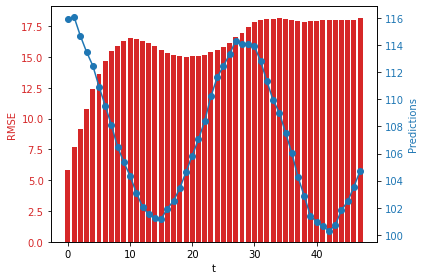

In [ ]:
#bar graph for RMSE
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('t')
ax1.set_ylabel('RMSE', color=color)
plt.bar(l, err, color=color)
ax1.tick_params(axis='y', labelcolor=color)

#predictions
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Predictions', color=color)
ax2.plot(l, gp, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

In [ ]:
#to shift test
z= ([x for x in range(train_size, train_size+len(testPredict))])

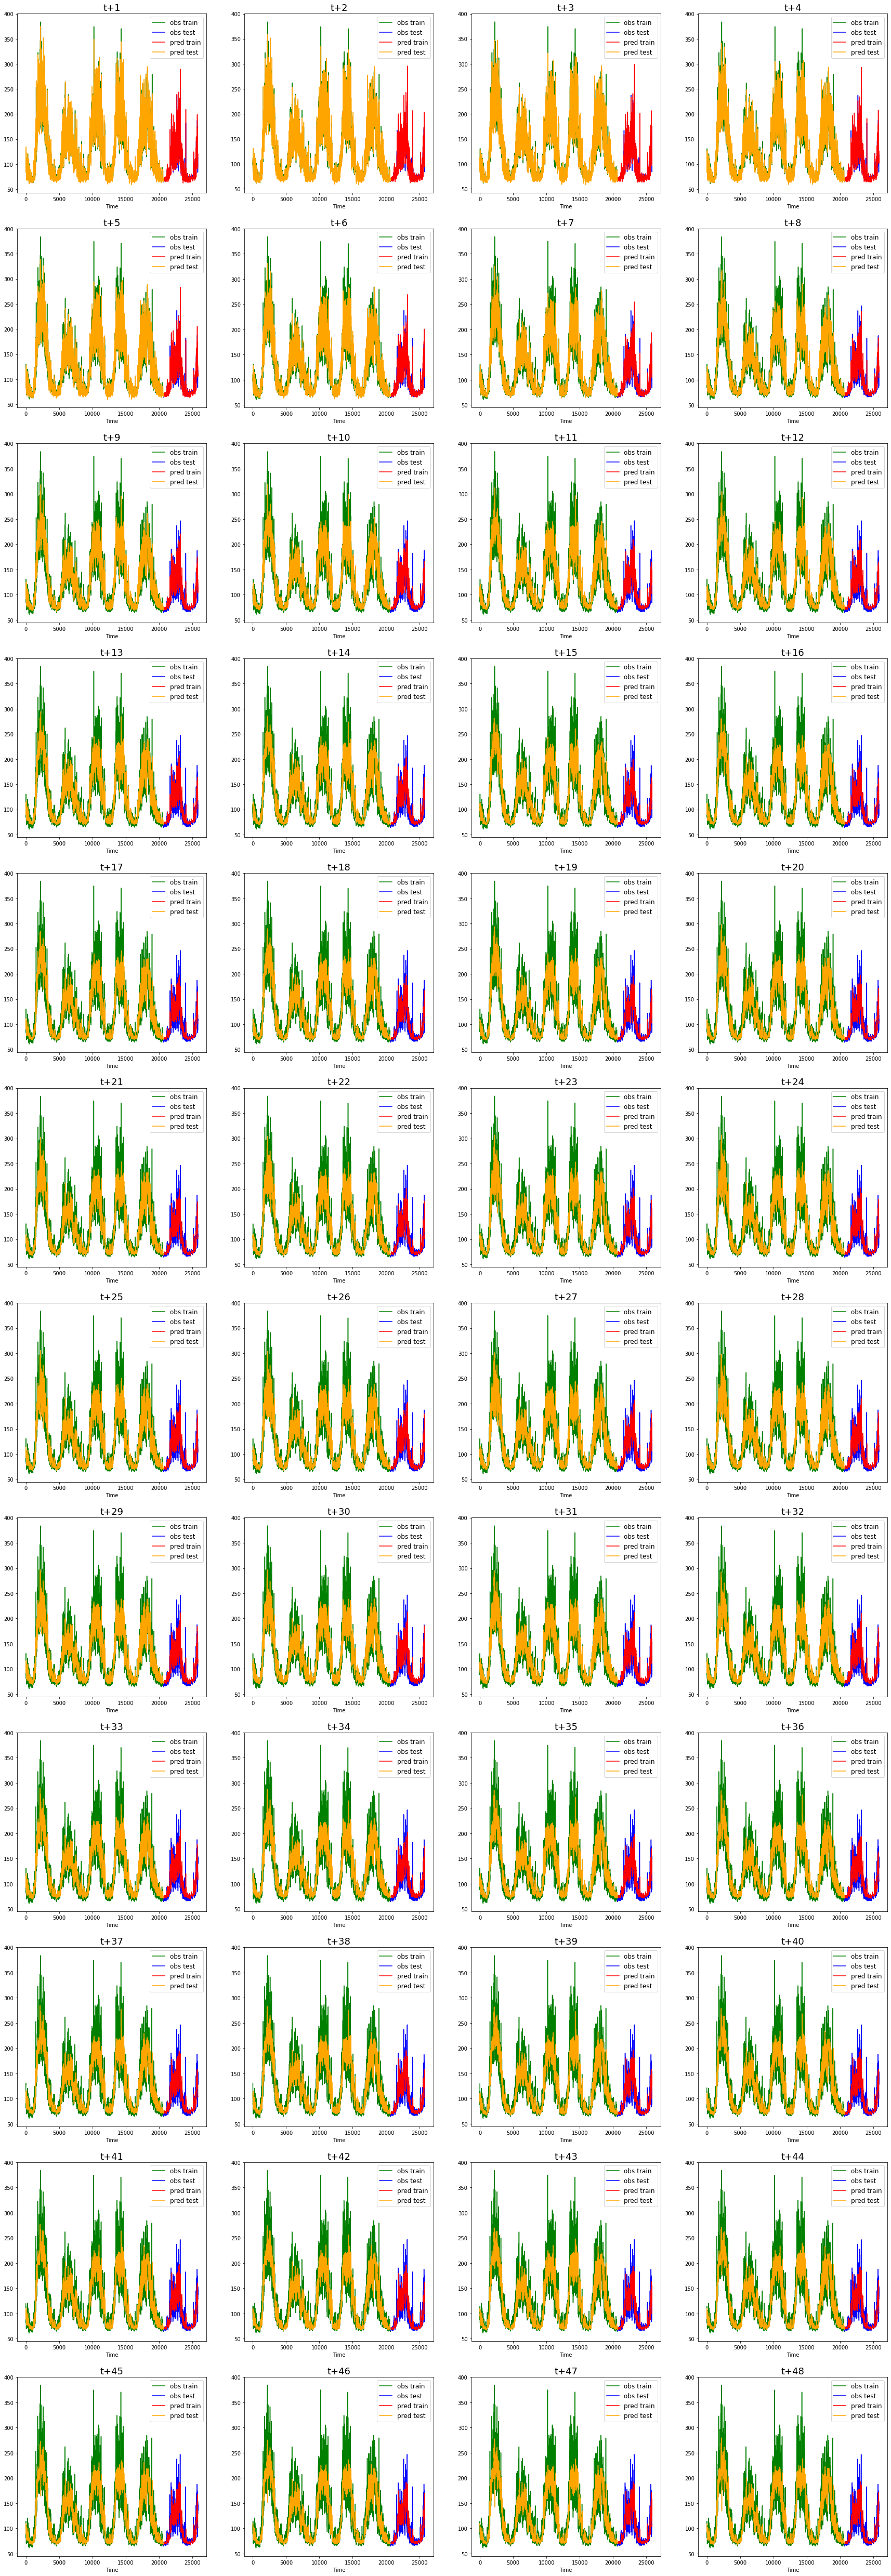

In [ ]:
#train and test observed and predicted 
fig, axes = plt.subplots(12,4, figsize = (30, 90))
for i in range(1, nout-1):
  plt.subplot(12, 4, i)
  plt.plot(obss[i],color='green', label='obs train')
  plt.plot(z, obs[i], color='blue', label='obs test')
  plt.plot(z, pred[i], color='red',label='pred train')
  plt.plot(predd[i],color='orange',label='pred test')
  plt.title('t+%d' % i, fontsize= 18)
  plt.legend(fontsize = 12)
  plt.xlabel('Time', fontsize = 10)

Text(0.5, 1.0, 't')

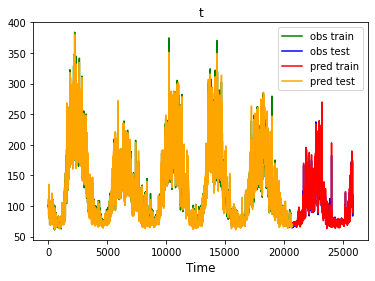

In [ ]:
#predictions and observed for t
plt.plot(obss[0],color='green', label='obs train')
plt.plot(z, obs[0],color='blue',label='obs test')
plt.plot(z, pred[0],color='red',label='pred train')
plt.plot(predd[0],color='orange',label='pred test')
plt.xlabel('Time', fontsize = 12)
plt.legend(fontsize = 10)
plt.title('t')

Text(0.5, 1.0, 't+24')

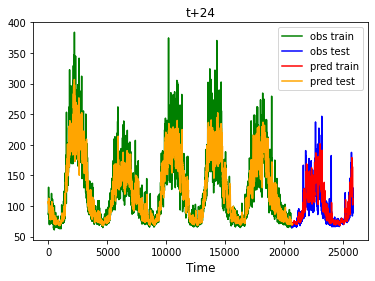

In [ ]:
#predictions and observed for t+24
plt.plot(obss[24],color='green',label='obs train')
plt.plot(z, obs[24],color='blue',label='obs test')
plt.plot(z, pred[24],color='red', label='pred train')
plt.plot(predd[24],color='orange',label='pred test')
plt.xlabel('Time', fontsize = 12)
plt.legend(fontsize = 10)
plt.title('t+24')

Text(0.5, 1.0, 't+49')

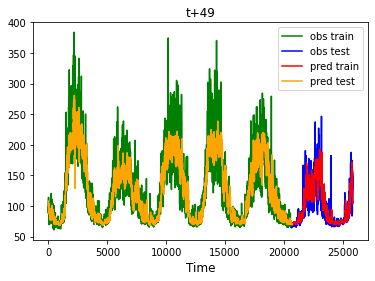

In [ ]:
#predictions and observed for t+49
plt.plot(obss[49],color='green',label='obs train')
plt.plot(z, obs[49],color='blue',label='obs test')
plt.plot(z, pred[49],color='red',label='pred train')
plt.plot(predd[49],color='orange',label='pred test')
plt.xlabel('Time', fontsize = 12)
plt.legend(fontsize = 10)
plt.title('t+49')

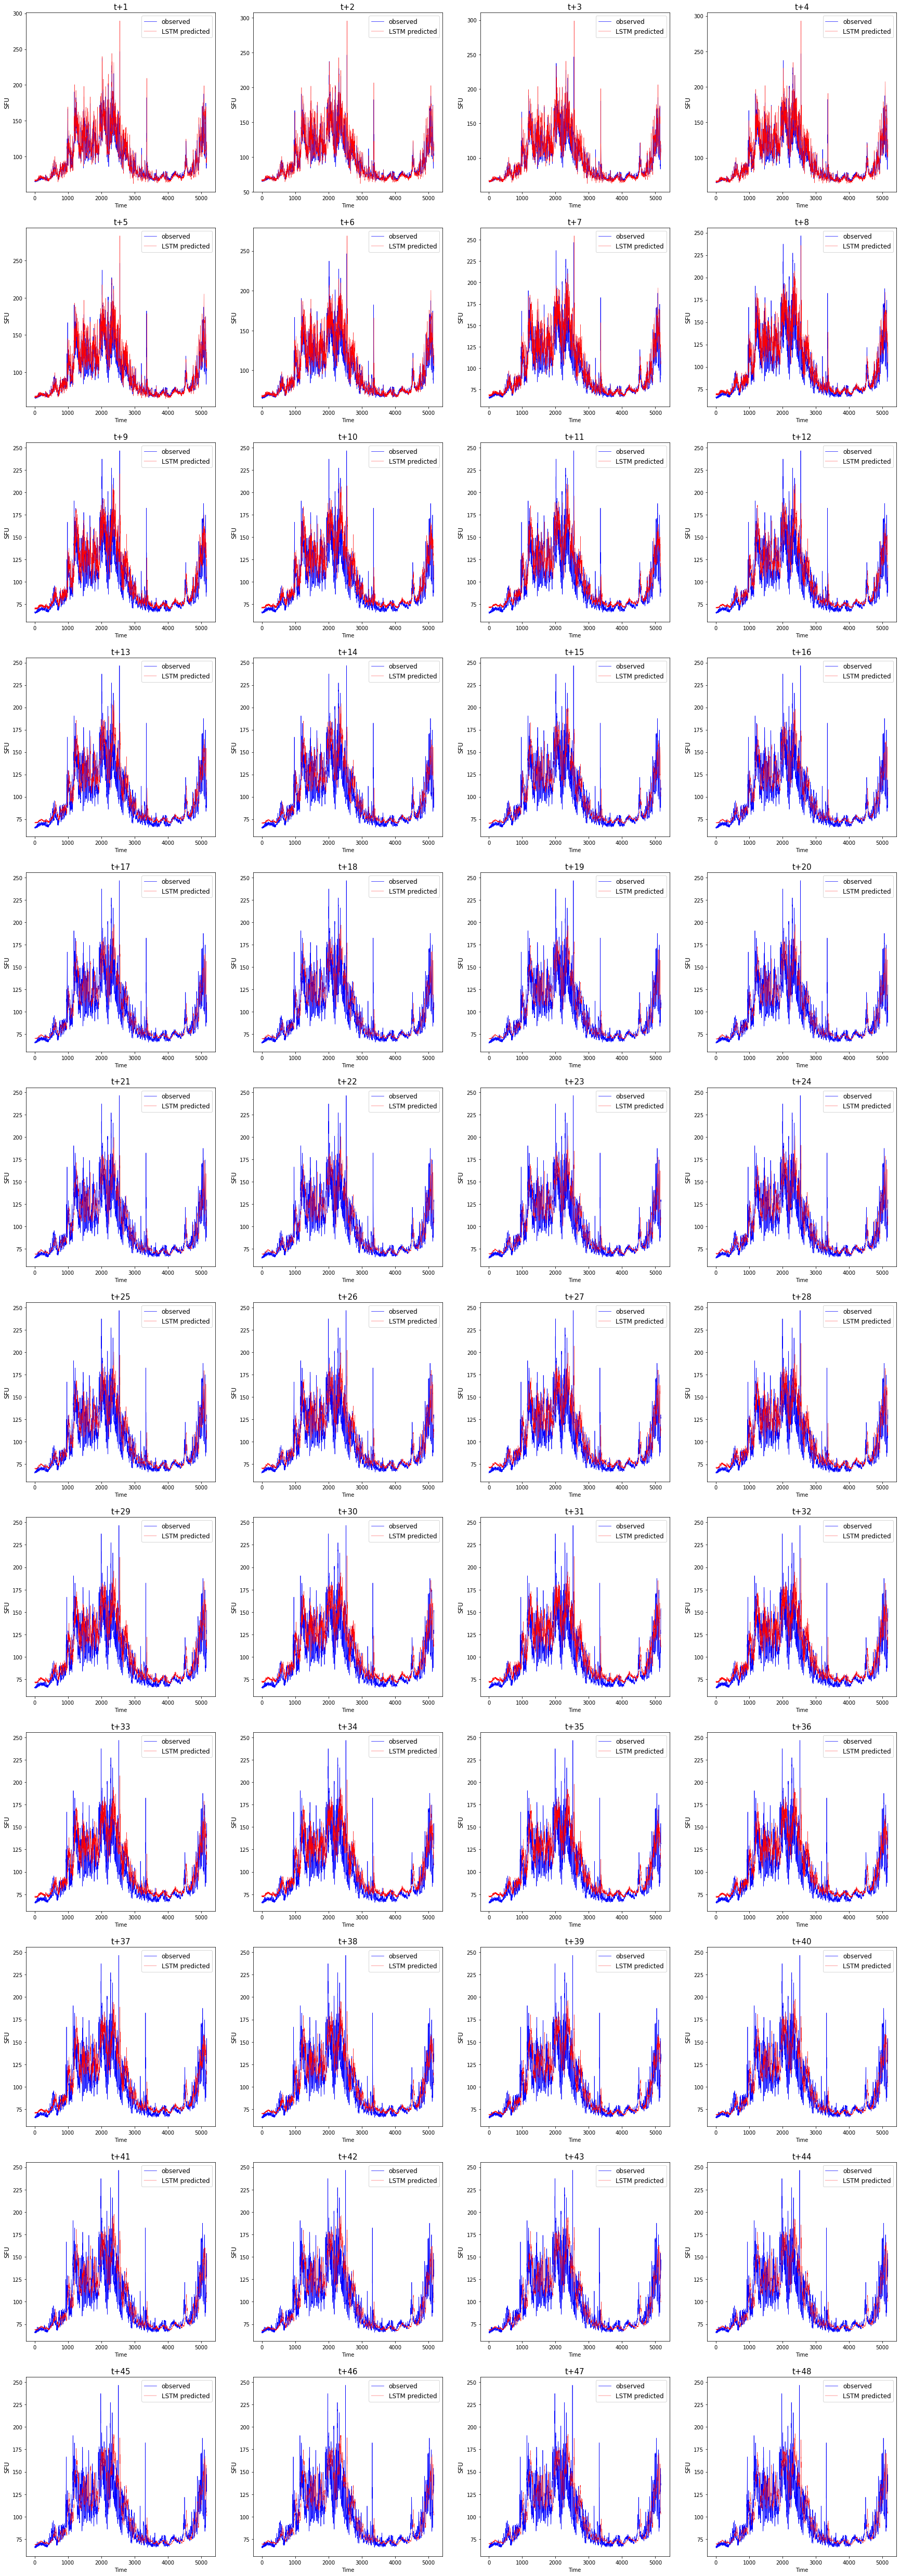

In [ ]:
# graphs of +1, ..., +49 predictions (test detail)
fig, axes = plt.subplots(12, 4, figsize = (30, 90))
for i in range(1, nout-1):
  plt.subplot(12, 4, i)
  plt.plot(obs[i], linewidth = 0.7, color = 'b',label = 'observed')
  plt.plot(pred[i], linewidth = 0.4, color = 'r',label = 'LSTM predicted')
  plt.legend(fontsize = 12)
  plt.ylabel('SFU', fontsize = 12)
  plt.xlabel('Time', fontsize = 10)
  plt.title('t+%d' % i, fontsize=15)

Text(0.5, 1.0, 't')

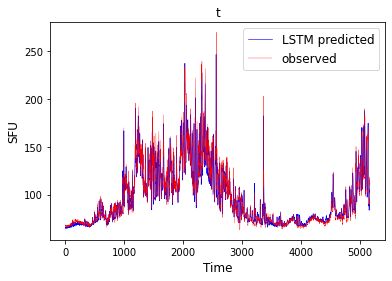

In [ ]:
#nowcast graph
plt.plot(obs[0], linewidth = 0.6, color = 'b', label = 'LSTM predicted')
plt.plot(pred[0], linewidth = 0.3, color = 'r', label = 'observed')
plt.legend(fontsize = 12)
plt.ylabel('SFU', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.title('t')

Text(0.5, 1.0, 't+24')

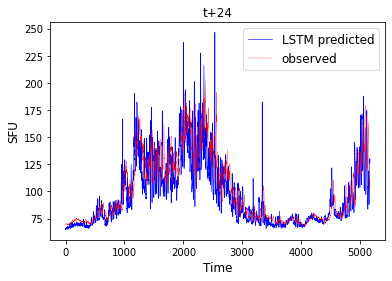

In [ ]:
#graph of +24 prediction
plt.plot(obs[24],linewidth = 0.6, color='b', label = 'LSTM predicted')
plt.plot(pred[24],linewidth = 0.3, color='r', label = 'observed')
plt.legend(fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('SFU', fontsize = 12)
plt.title('t+24')

Text(0.5, 1.0, 't+49')

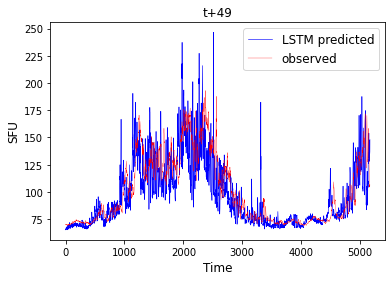

In [ ]:
#graph of +49 prediction
plt.plot(obs[49],linewidth = 0.6, color='b', label = 'LSTM predicted')
plt.plot(pred[49],linewidth = 0.3, color='r', label = 'observed')
plt.legend(fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('SFU', fontsize = 12)
plt.title('t+49')

In [ ]:
#compute correlation and show it
correlation = []
for i in range(0,nout):
  correlation.append(obs[i].corr(pred[i]))

correlation

[0.9809103359210614,
 0.9695487772574651,
 0.9551021464918107,
 0.9400678574892037,
 0.9220831029962719,
 0.9076031597042818,
 0.89324605599864,
 0.8828938055522433,
 0.8753559171118217,
 0.8707868348534192,
 0.8679279041415857,
 0.867127545384524,
 0.8670533063008931,
 0.867861517325724,
 0.8687667644705503,
 0.8699247915600967,
 0.8711656423773675,
 0.872221499807602,
 0.8727359627883395,
 0.8728841888251481,
 0.8725312605008287,
 0.8718063200546424,
 0.8708264228292271,
 0.8695662830887804,
 0.8679372224399162,
 0.8654688538408152,
 0.8621613873145065,
 0.8585637867563326,
 0.8539569391350762,
 0.8489909941758446,
 0.8439228164826063,
 0.8397389530081639,
 0.8356402076749392,
 0.8320136939979161,
 0.829876042271807,
 0.8286111308467319,
 0.8274222051785023,
 0.8265802790538124,
 0.8255777074127414,
 0.8252226660535784,
 0.8248606126165189,
 0.8244109913366315,
 0.8240879602256908,
 0.8236635937673058,
 0.8234137464471635,
 0.823143003258737,
 0.8225689227095887,
 0.8214425967681659,

In [ ]:
#model evaluation
print(model.evaluate(test_X,test_y))

162/162 [==============================] - 1s 4ms/step - loss: 0.0025
0.002514853375032544


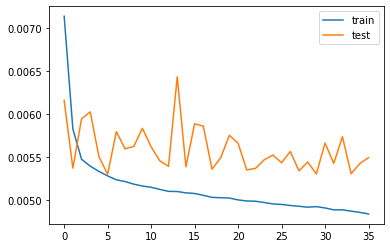

In [ ]:
#plot history
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()